## Uncertainty Quantification (UQ)

In traditional *supervised learning*, we have data features and target data. The result is to have a neural network that maps input data that maps to predicted target that maps the true targets.

This gives us an expected target, but we want to go beyond this and learn the uncertainties associated with it.

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/probs.png?raw=1" alt="probs" style="width:30%; height:auto;">
</div>

A big theme with this tutorial is: **Do not mistake probability for model confidence**. I will explain this shortly.

Let's say we train a neural network to discriminate between cats and dogs based on images. This network learns features in these images, such as whiskers for cats or floppy ears for dogs. This networks creates an internal representation to discern features from these images and then makes a decision whether it is a cat or a dog. The last layer is `softmax` in order to create probabilities that sum to 1.

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/pet_model.png?raw=1" alt="probs" style="width:35%; height:auto; object-fit:cover; object-position:top; margin-top:-4%; clip-path:inset(20% 0 0 0);">
</div>

The main challenge in uncertainty quantification and anomaly detection is that models are typically trained on clean, well-curated data. However, real-world data is often messy and unpredictable.

When we deploy our models, it's not enough to simply classify an image—we also need to know how confident the model is in its prediction.

For example, if we train a network to distinguish between cats and dogs, and then test it on an image of a boat (something it has never seen before), the model will still output a probability for "cat" or "dog." However, it won't indicate how uncertain it is about this prediction.

We need a way for a model to say **hmm...I don't know** <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/hmm.png?raw=1" alt="hmm" style="height:1em; vertical-align:middle;">

<div align="center" style="display: flex; justify-content: center; gap: 2em;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/reality.png?raw=1" alt="reality" style="width:35%; height:auto;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/new.png?raw=1" alt="new" style="width:35%; height:auto;">
</div>

There are two main types of uncertainty:
 - **Aleatoric Uncertainty**
    - Relates to the inherent noise or randomness in the input data
    - Becomes significant when the data is noisy or ambiguous
    - Cannot be minimized by collecting more data
 - **Epistemic Uncertainty**
    - Reflects uncertainty in the model’s predictions due to limited knowledge
    - Is high when the model has not seen enough diverse training examples
    - Can be reduced by gathering additional data or improving the model

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/uncertainty.png?raw=1" alt="probs" style="width:30%; height:auto;">
</div>

Aleatoric uncertainty can be learned directly using neural networks, but epistemic uncertainty is much more challenging to estimate.

Q: *How can a model understand when it doesn't know the answer?*

A: Instead of learning a fixed set of weight numbers, we replace those numbers with distributions. This is called Bayesian neural networks. However, this problem becomes intractable, so we use approximations.

These approximations involve running $T$ forward passes on the same input data using different weights. For example:
 - **Dropout** (left image) randomly zeros out some number of nodes, and the spread of those predictions gives you an estimate of the epistemic uncertainty.
 - **Ensemble** (right image) involves independently training $T$ different models, and the variance of that gives you the epistemic uncertainty.

<div align="center" style="display: flex; justify-content: center; gap: 2em;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/dropout.png?raw=1" alt="Dropout (left)" style="width:25%; height:auto;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/ens.png?raw=1" alt="Ensemble (right)" style="width:25%; height:auto;">
</div>

There are downsides to Bayesian Deep Learning, which include:
 - **Slow**: Requires running the network $T$ times for each input
 - **Memory**: Stores $T$ copies of the network in parallel
 - **Efficiency**: Sampling hinders real-time on edge devices
 - **Calibration**: Sensitive to prior and often over-confident

Let's say that each model has a mean and a data uncertainty, like the top left image. If you have an ensemble of these models (bottom left image), We can see that each of these ensemble puts an X on the rightmost graph. The x-axis is the mean $\mu$ while the y-axis is the data uncertainty $\sigma^2$.

Instead of this brute force sampling, can we instead **directly** learn the parameters defining this underlying likelihood distribution?

<div style="max-width:700px; margin:auto;">
    <div style="display: flex; align-items: flex-start; gap: 2em;">
            <div style="display: flex; flex-direction: column; justify-content: space-between; height: 300px;">
                    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/im1.png?raw=1" alt="im1" style="max-height:145px; ">
                    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/im2.png?raw=1" alt="im2" style="max-height:145px; margin-top:2%; object-fit:contain; aspect-ratio:1/1;">
            </div>
            <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/im3.png?raw=1" alt="im3" style="max-height:310px; object-fit:contain;">
    </div>
</div>

## Evidential Deep Learning

Evidential Deep Learning (EDL) recasts the learning as an evidence acquisition process. The more evidence we have, the more confidence we have. It takes a *Theory of Evidence* perspective: $\operatorname{softmax}$ is interpreted as the parameter set of a categorical distribution which is replaced by the parameters of a **Dirichlet density** (a factory of softmax point estimates). From left to right, we have:
 - Low uncertainties,, which indicates high confidence
 - High aleatoric (data) uncertainty
 - High epistemic (model) uncertainty

 **Goal: train a neural network to learn these type of evidential distributions**

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/dists.png?raw=1" alt="dists" style="width:50%; height:auto;">
</div>

In this tutorial, we focus on classification, though it is also applicable to regression. More information on EDL for regression is available [here](https://arxiv.org/abs/1910.02600).

**Sampling from an evidential distribution yields individual new distributions over the data.** So you can think of this as a second-order learning problem. You want to learn the $\alpha_k$ parameters of a Dirichlet distribution ($\alpha_k > 0 $). In the image below, we can see an example of a [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) with three classes, making a triangle. More classes creates a [simplex](https://en.wikipedia.org/wiki/Simplex). These model parameters determine the density inside of this classification simplex. We replace the Categorical distribution that we've been using to get probabilities with a Dirichlet distribution. Sampling from this gives us our probabilities. For exampling, the middle of the Dirichlet distribution will result in equal probabilities for all classes.

We choose the Dirichlet distribution as our *evidential* distribution because it is the conjugate prior in the context of Bayesian inference. The proofs for why these are chosen are available in the original [paper](https://papers.nips.cc/paper_files/paper/2018/hash/a981f2b708044d6fb4a71a1463242520-Abstract.html).

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/dirichlet.png?raw=1" alt="dists" style="width:30%; height:auto;">
</div>

For our network with model weights $\Theta$, instead of outputting the probabilities using a `softmax` layer, we use a `ReLU` layer to ensure $\alpha_k > 0$. Then, we perform multi-objective training by modifying the loss function, shown in the images below. We include a reconstruction loss to ensure the accuracy is high, and we add a regularization term to penalize large confidence to uncertain samples. You achieve this through KL divergence between you predicted Dirichlet distribution and the unit Dirichlet distribution ($\alpha_k=1$) which is completely uncertain. The $\lambda_t$ term controls the strength of the regularization term. Similar to the original paper, we increase $\lambda_t$ over epochs.
$
\begin{align}
    \mathcal{L}(\Theta)=\sum_{i=1}^{N}\mathcal{L}_{MSE}(\Theta)_i+\lambda_t\sum_{i=1}^{N}\mathcal{L}_{KL}(\Theta)_i
\end{align}
$

<div align="center" style="display: flex; justify-content: center; gap: 2em;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/model.png?raw=1" alt="Model (left)" style="width:25%; height:auto;">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/diagram.png?raw=1" alt="Diagram (right)" style="width:25%; height:auto;">
</div>

Specifically, the outputs of the network, denoted as $f_k(\mathbf{x}|\Theta)$, directly provide the evidence for the anticipated Dirichlet distribution through.
$$
\begin{equation*}
e_k = f_k(\mathbf{x}|\Theta) ~~~\textrm{and}~~~ \alpha_k = f_k(\mathbf{x}|\Theta) + 1
\end{equation*}
$$

Once the network learns the parameters $\alpha$, its mean, can be taken as an estimate of the class probabilities: $$p_k = \mathbb{E}(x_k) = \frac{\alpha_k}{S}$$ where the sum $S = \sum_{k=1}^{K}\alpha_k = \sum_{k=1}^{K}(e_k + 1)$ represents the Dirichlet strength. The epistemic uncertainty can then be estimated as $$u = \frac{K}{S}$$ where $K$ is the number of classes. More information is available in our paper [here](https://iopscience.iop.org/article/10.1088/2632-2153/ade51b).


## Getting started

If you're running within Google Colab:
- Go to Runtime -> Change runtime type and select GPU

If you're running locally  
- Run `pip install -r requirements.txt` to install the necessary requirements

#### Import all necessary packages

In [ ]:
!rm -rf GDSVirtualTutorials
!git clone https://github.com/butler-julie/GDSVirtualTutorials.git
%cd GDSVirtualTutorials/100325_UncertaintyQuantification/

In [ ]:
!pip install torchinfo

In [1]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
import os, json, sys
import matplotlib.pyplot as plt
import json
import seaborn as sns
import h5py
from matplotlib.colors import LogNorm
from EvalTools import *
import gc
from sklearn.decomposition import PCA


#### Downloading and preprocessing data

We apply EDL to identify jets at LHC using an explainable AI inspired $t$-quark tagger called the Particle Flow Interaction Network (PFIN). The first dataset (`TopData`) has 2M simulated jets and two classes: top quark jets (label=1) and QCD jets (label=0).

In [ ]:
orig_dir = os.getcwd()

try:
    os.chdir('datasets/topdata')
    !rm -rf processed
    !rm download
    !rm -rf raw
    !mkdir -p processed
    !wget https://desycloud.desy.de/index.php/s/llbX3zpLhazgPJ6/download
    !unzip download
    !mv v0/ raw/
    !rm download
    !python topdata_preprocess.py
finally:
    os.chdir(orig_dir)

<div align="center">
    <img src="https://github.com/butler-julie/GDSVirtualTutorials/blob/main/100325_UncertaintyQuantification/images/top.png?raw=1" alt="top" style="width:50%; height:auto;">
</div>

We also use another dataset called `JetNet`. This dataset consists of 880k particle jets originating from gluons ($g$), light quarks ($q$), top quarks ($t$), and bosons ($W$ and $Z$). We examine how these models can be used to perform anomaly detection (AD) through thresholding. We test these on out-of-distribution (OOD) jets: jets that aren't given during training.

In [ ]:
orig_dir = os.getcwd()

try:
    os.chdir('datasets/jetnet')
    !mkdir -p raw
    !mkdir -p processed
    !wget -O raw/g.hdf5 "https://zenodo.org/records/6975118/files/g.hdf5?download=1"
    !wget -O raw/q.hdf5 "https://zenodo.org/records/6975118/files/q.hdf5?download=1"
    !wget -O raw/t.hdf5 "https://zenodo.org/records/6975118/files/t.hdf5?download=1"
    !wget -O raw/w.hdf5 "https://zenodo.org/records/6975118/files/w.hdf5?download=1"
    !wget -O raw/z.hdf5 "https://zenodo.org/records/6975118/files/z.hdf5?download=1"
    !python jetnet_preprocess.py
finally:
    os.chdir(orig_dir)

We specify the reconstruction loss below as

$$
\begin{align}
    \mathcal{L}_{MSE}(\Theta)_i
    &=
    \sum_{k=1}^K\mathbb{E} [ \left(y_{ik} - { \hat{y}}_{ik}\right)^2 ] { \,\,= \sum_{k=1}^K\mathbb{E} \left[ \left(y_{ik} - \frac{f_i(x_{k}|\Theta) + 1}{\sum_{j=1}^{K}(f_j(x_{k}|\Theta) + 1)}\right)^2 \right]}
\end{align}
$$

In [2]:
def LossMSE(labels, outs):
    # labels size: (Nb, nclasses) [true values]
    # outs size: (Nb, nclasses) [NN predictions]
    alphas = outs + 1
    S = torch.sum(alphas, 1).reshape(-1,1)
    probs = alphas / S
    return ((labels - probs)**2 + probs * (1 - probs) / (1 + S)).sum(1).mean()

The second component of the loss function is a KL Divergence term defined as

$$
\begin{align}
    \mathcal{L}_{KL}(\Theta)_i&=KL[D(\mathbf{{\hat{y}}}_i|\mathbf{\tilde{\alpha}_i})\|D(\mathbf{{ \hat{y}}}_i|\left \langle 1,\cdots,1 \right \rangle)] \\
    &=\log \left (\frac{\Gamma(\sum_{k=1}^K\tilde{\alpha}_{ik})}{\Gamma(K)\prod_{k=1}^K\Gamma(\tilde{\alpha}_{ik})} \right ) + \sum_{k=1}^K (\tilde{\alpha}_{ik}-1) \left [ \psi(\tilde{\alpha}_{ik}) - \psi\left(\sum_{j=1}^K \tilde{\alpha}_{ij}\right) \right] \nonumber
\end{align}
$$
where
$$
\begin{equation*}
    \mathbf{\tilde{\alpha}_i} = \mathbf{y_i} + (1 - \mathbf{y_i}) \odot \mathbf{\alpha_i} { ~~~\textrm{and}~~~ \alpha_i = f_i(\mathbf{x}|\Theta) + 1}
\end{equation*}
$$
and $\psi(\cdot)$ is the digamma function.

In [3]:
def KLDiv(labels, outs):
    K = torch.tensor(labels.shape[-1]).float()
    alphas = outs + 1
    _alphas = labels + (1-labels)*alphas
    _S = torch.sum(_alphas, 1).reshape(-1,1)
    lognum = torch.lgamma(_S)
    logden = torch.lgamma(K*1.0) + torch.lgamma(_alphas).sum(1).reshape(-1,1)
    t2 = ((_alphas - 1) * (torch.digamma(_alphas) - torch.digamma(_S) )).sum(1).reshape(-1,1)
    return (lognum - logden + t2).mean()

## `TopData` Model

For this model, we examine the use of EDL on uncertainty quantification. The goal is for these misclassified jets to have high uncertainties while all other jets should have low uncertainties. This ensures that we can accurately detect misclassified jets by the model.

### Training

First, we load the pre-loaded parameters for our model. The name of the file corresponds to the $\lambda_t$ used in the loss. `nominal` means increasing over epochs with slope 0.1. `1.0` refers to the maximum $\lambda_t$. You can change the name of your file to use different strengths for the KL Divergence term.

In [4]:
file_name = 'UQPFIN_topdata_nominal_1.0_baseline.json'
parameters = json.load(open(f'json_files/{file_name}'))
parameters

{'outdir': './trained_models/',
 'outdictdir': './trained_model_dicts/',
 'Np': 60,
 'n_phiI': 128,
 'x_mode': 'sum',
 'phi_nodes': '100,100,64',
 'f_nodes': '64,100,100',
 'epochs': 50,
 'label': 'topdata_nominal_1.0_baseline',
 'batch_size': 250,
 'data_loc': './datasets/',
 'data_type': 'topdata',
 'preload': False,
 'preload_file': '',
 'klcoef': 'nominal',
 'massrange': 'AND:0,10000.',
 'ptrange': 'AND:0,10000',
 'etarange': 'AND:-6,6',
 'skiplabels': '',
 'batchmode': False,
 'use_softmax': False,
 'use_dropout': False,
 'ndata': 0}

Then, we can train the model and save the checkpoints based on the highest accuracy. If you want to instead use the results that I've already trained, you don't need to run these next two cells.

In [ ]:
!python train.py --load-json json_files/UQPFIN_topdata_nominal_1.0_baseline.json

In [ ]:
%run evaluate_model.py --data topdata --make-file --type edl

### Evaluation

We can then evaluate the results on a test set, visualize the uncertainties, examine the latent space, and compare EDL with baselines like Ensemble and MC Dropout. Below, we look at the accuracy and `AUROC`. Area Under the Receiver Operating Characteristic Curve (`AUROC`) is commonly used metric to represent the overall quality of binary classification models. In our context, the `AUROC` represents how well the uncertainty estimate of a model correlates with an inability of the model to distinguish certain jet classes or identify anomalous jets. 

In a well-trained classification model, we want the model to be confident, i.e. assign low uncertainties, for correctly classified jets. On the other hand, large uncertainties should be associated with misclassified jets (in a UQ model) or anomalous jets (in an anomaly detection model). A higher value of the AUROC would represent the model's superiority in projecting confidence for correctly classified jets while assigning larger uncertainties for incorrectly classified  or anomalous jets, depending on the model.

In [5]:
#optional parameters to only evaluate certain models
optional_dataset = 'topdata'
optional_tag = ''
results_dir = 'results/'
saved_model_loc = "./trained_models/"
saved_model_dict_loc = "./trained_model_dicts/"

result_files = sorted([f for f in os.listdir(results_dir) if optional_dataset in f and optional_tag in f
                       and '.h5' in f and 'slope' not in f and 'mask' not in f])
print('\n'.join(result_files))

RESULTS_UQPFIN_Ensemble_topdata_baseline.h5
RESULTS_UQPFIN_MCDO_topdata_baseline.h5
RESULTS_UQPFIN_best_topdata_nominal_1.0_baseline.h5


Below, we compute the accuracy and `AUROC` for the EDL and baseline models. The model accuracy is found to be very similar EDL and Ensemble. However, EDL has the largest `AUROC` indicating better uncertainty estimations.

In our [paper](https://iopscience.iop.org/article/10.1088/2632-2153/ade51b/pdf), EDL models with higher $\lambda_t$ tend to have marginally lower accuracy but higher `AUROC` especially in multiclass datasets. This implies that EDL models with higher $\lambda_t$ make more incorrect predictions but tend to assign commensurately larger uncertainties to them. This is not visible in `TopData` models, but you can see this trend in the next section.

In [6]:
for modelname in result_files:
    model_results = {}
    if "best" in modelname:
      mname = modelname[20:-3]
    else:
      mname = modelname[15:-3]
    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    labels, preds, oods, probs, uncs, sums = f['labels'][:], f['preds'][:], f['oods'][:], f['probs'][:], f['uncs'][:], f['sums'][:]
    acc = accuracy_score(labels[~oods], preds[~oods])*100
    if "topdata" in mname:
        probs2=probs
    else:
        skiplabels = np.unique(labels[oods])
        probs2=np.delete(probs, skiplabels, 1)

    if probs2.shape[1] == 2:
        probs2 = probs2[:, 1]

    # misclassification detection vs out-of-distribution detection
    if "baseline" in mname:
        oods = labels != preds

    this_file = os.path.join(saved_model_loc, modelname[8:-3])
    gc.collect()

    # Sensory et al EDL Uncertainty
    auc = roc_auc_score(oods, uncs) * 100
    print("{:<28}  \t\t Accuracy: {:>6.2f}%  \t AUROC: {:>6.2f}%".format(mname, acc, auc))


Ensemble_topdata_baseline     		 Accuracy:  93.66%  	 AUROC:  89.00%
MCDO_topdata_baseline         		 Accuracy:  93.34%  	 AUROC:  88.72%
topdata_nominal_1.0_baseline  		 Accuracy:  93.67%  	 AUROC:  90.38%


#### EDL Uncertainty Plots

Since `TopData` only contains two classes, it is a simple dataset to investigate the uncertainty generated from EDL. In the plots below, the total uncertainty corresponds to two distinct peaks: smaller uncertainties are attributed to correctly classified jets while the misclassified jets tend to be assigned larger uncertainties. 

In our [paper](https://iopscience.iop.org/article/10.1088/2632-2153/ade51b/pdf), we find that as we increase $\lambda_t$, there are more high-uncertainty jets. As $\lambda_t$ increases, the regularizing KL-divergence term takes more priority, penalizing the divergences from the "I do not know" state. Then, the EDL model with larger $\lambda_t$ will have smaller Dirichlet parameters and high uncertainties as opposed to an EDL model with $\lambda_t =0$.

In the heatmaps below, the EDL mode conforms with the general expectations from a well-trained uncertainty-aware classifier, that is (a) a general inverse relationship between Max. Prob and uncertainty and (b) a high concentration of correctly classified events in the low uncertainty bins. In addition, when it is misclassified (in the bottom right figure), there tends to be more jets with higher uncertainties.

topdata_nominal_1.0_baseline


C:\Users\khota\AppData\Local\Temp\ipykernel_22236\915437889.py:116: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  indices = np.in1d(labels, np.where(groups == uniq_names[i])[0])
C:\Users\khota\AppData\Local\Temp\ipykernel_22236\915437889.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
C:\Users\khota\AppData\Local\Temp\ipykernel_22236\915437889.py:225: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])


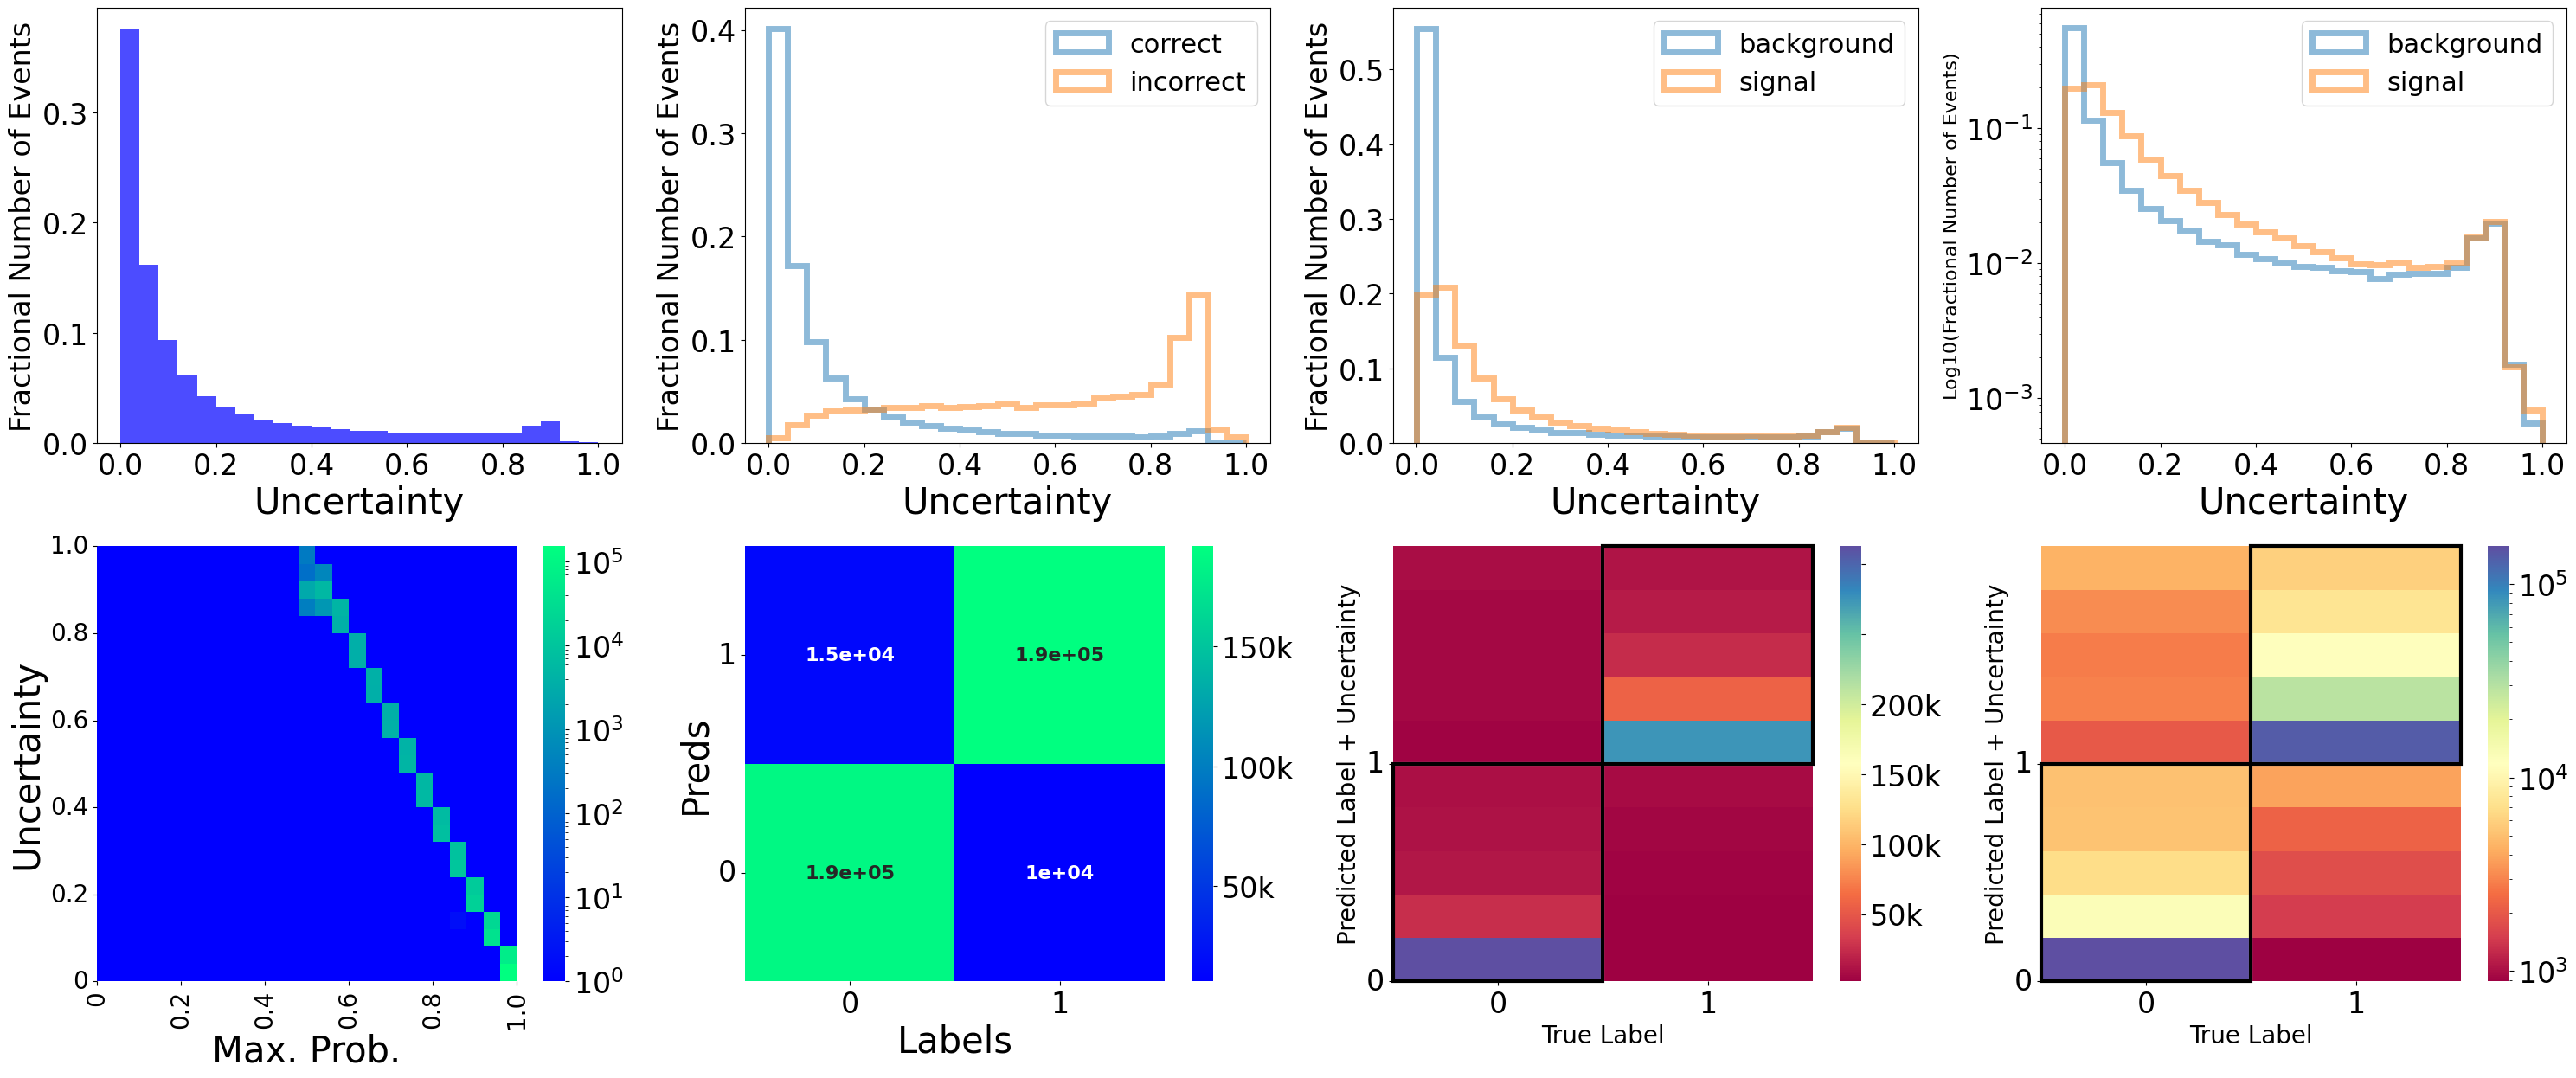

In [7]:
for modelname in result_files:
    if "best" not in modelname:
      continue
    key = modelname[20:-3]
    print(key)

    if "jetnet" in key:
        l_max = 5
        fsize=18
        groups = ['QCD', 'QCD', 'Top', 'Bosons', 'Bosons']
    elif "jetclass" in key:
        l_max = 10
        fsize=10
        groups = ['QCD', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Bosons', 'Bosons', 'Top', 'Top']
    elif "JNqgmerged" in key:
        l_max = 4
    else:
        l_max = 2
        fsize=16
        groups = ["background", "signal"]
    groups = np.array(groups)

    uniq_names, ind = np.unique(groups, return_index=True)
    uniq_names = uniq_names[np.argsort(ind)]


    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    labels, preds, maxprobs, sums, oods, uncs, probs = f['labels'][:], f['preds'][:], \
                                                f['maxprobs'][:], f['sums'][:], \
                                                f['oods'][:], f['uncs'][:], f['probs'][:]
    f.close()

    split = key.split('_')
    coeff = "_".join(split[1:-1])
    # Choose to use D-STD Uncertainty or not
    for use_std in [False]:
        high_unc = 0.8
        if use_std:
            sums = torch.from_numpy(sums).reshape(-1,1)
            probs = torch.from_numpy(probs)
            uncs = torch.sqrt(((probs*(1 - probs))/(sums + 1))).sum(1).numpy()
            coeff += "_std"
            high_unc = 0.5

        savefolder = "figures/{}/{}/{}/".format(split[0], split[-1], coeff)
        os.makedirs(savefolder, exist_ok=True)

        if 'baseline' in key:
            f1 = 'correct'
            f2 = 'incorrect'
            oods = labels != preds
        else:
            f1 = 'id'
            f2 = 'ood'


        mult_label = "Unc"
        if "_0_" in key:
            if "topdata" in key:
                multiple = 300
                if use_std:
                    multiple = 30
            elif "jetnet" in key:
                if "skiptop" in key:
                    multiple = 5
                elif "skiptwz" in key:
                    multiple = 25
                else:
                    multiple = 5*2.5
                    if "skipwz" in key and not use_std:
                        multiple *= 4
            elif "jetclass" in key:
                if "baseline" in key:
                    multiple = 15
                elif "skipwz" in key:
                    multiple = 5*2.5
                else:
                    multiple = 25
            uncs = uncs * multiple
            mult_label = str(multiple) + r' $\times$ Unc'

        # Create combined figure with all plots
        fig = plt.figure(figsize=(30, 24))
        
        # Counter for subplot position
        plot_idx = 1

        for types in ['total', 'separate']:
            # Uncertainty distribution
            ax = plt.subplot(4, 4, plot_idx)
            plot_idx += 1

            if 'total' in types:
                ax.hist(uncs, bins=np.arange(0.,1.01,0.04), alpha = 0.7, color='blue', weights = (1./len(uncs)) * np.ones_like(uncs))
            else:
                ax.hist(uncs[~oods], bins=np.arange(0.,1.01,0.04), label=f1, alpha = 0.5, histtype = 'step', linewidth = 5, weights = (1./len(uncs[~oods])) * np.ones_like(uncs[~oods]))
                ax.hist(uncs[oods], bins=np.arange(0.,1.01,0.04), label=f2, alpha = 0.5, histtype = 'step', linewidth = 5, weights = (1./len(uncs[oods])) * np.ones_like(uncs[oods]))
                ax.legend(fontsize = 22)
            ax.set_xlabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax.set_ylabel("Fractional Number of Events", fontsize = 24)
            if 'log' in types:
                ax.set_ylabel("Log10(Fractional Number of Events)", fontsize = 24)
                ax.set_yscale('log')
            ax.tick_params(axis='both', which='major', labelsize=24)
            ax.yaxis.get_offset_text().set_fontsize(24)


        for types in ['normal', 'log']:
            # Uncertainty distribution
            ax = plt.subplot(4, 4, plot_idx)
            plot_idx += 1

            for i in range(len(uniq_names)):
                indices = np.in1d(labels, np.where(groups == uniq_names[i])[0])
                if np.any(indices & oods) and "skip" in key:
                    lstyle = '--'
                    lbel = f"{uniq_names[i]} (OOD)"
                else:
                    lstyle = '-'
                    lbel = uniq_names[i]
                ax.hist(uncs[indices], bins=np.arange(0.,1.01,0.04), label=lbel, alpha = 0.5, histtype = 'step', linewidth = 5, linestyle = lstyle, weights = (1./len(uncs[indices])) * np.ones_like(uncs[indices]))
            ax.legend(fontsize = 22)
            ax.set_xlabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax.set_ylabel("Fractional Number of Events", fontsize = 24)
            if 'log' in types:
                ax.set_ylabel("Log10(Fractional Number of Events)", fontsize = 16)
                ax.set_yscale('log')
            ax.tick_params(axis='both', which='major', labelsize=24)
            ax.yaxis.get_offset_text().set_fontsize(24)


        filetypes = ['total']
        indices = [oods | ~oods]


        for filetype, idx in zip(filetypes, indices):
            # Max Prob. vs Uncertainty distribution (Log Scale)
            hist, _, _ = np.histogram2d(maxprobs[idx], uncs[idx], bins = [np.arange(0.,1.01,0.04), np.arange(0.,1.01,0.04)])

            ax_main = plt.subplot(4, 4, plot_idx)
            plot_idx += 1
            heatmap = sns.heatmap(hist.T+1, annot=False, cmap='winter', ax=ax_main, norm=LogNorm())
            ax_main.invert_yaxis()
            ax_main.set_xlabel("Max. Prob.", fontsize=30)
            ax_main.set_ylabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax_main.set_yticks(np.arange(0, 26, 5))
            ax_main.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=0)
            ax_main.set_xticks(np.arange(0, 26, 5))
            ax_main.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
            ax_main.tick_params(axis='both', which='major', labelsize=20)
            cbar = heatmap.collections[0].colorbar
            cbar.ax.tick_params(labelsize=24)

        for filetype, idx in zip(filetypes, indices):
            # Labels vs Preds
            arr = np.zeros((l_max,l_max))
            for i in range(l_max):
                for j in range(l_max):
                    arr[j, i] = np.sum((labels[idx] == i) & (preds[idx] == j))

            ax_main = plt.subplot(4, 4, plot_idx)
            plot_idx += 1
            heatmap = sns.heatmap(arr, annot=True, cmap='winter', annot_kws={"size": fsize, "weight": "bold"}, ax=ax_main)
            ax_main.invert_yaxis()
            ax_main.set_xlabel("Labels", fontsize=30)
            ax_main.set_ylabel("Preds", fontsize=30)
            ax_main.tick_params(axis='both', which='major', labelsize=24)
            ax_main.tick_params(axis='y', labelrotation=0)
            cbar = heatmap.collections[0].colorbar
            cbar.ax.tick_params(labelsize=24)
            cbar.ax.yaxis.get_offset_text().set_fontsize(24)
            if 'topdata' in key or 'jetnet' in key:
                tick_values = cbar.get_ticks()
                cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])

        for types in ['normal', 'log']:
            for filetype, idx in zip(filetypes, indices):
                # Labels vs Preds + Uncertainty
                uncertainty_bins = np.zeros((5*l_max, l_max))  # 5 bins for uncertainty
                for i in range(l_max):
                    for j in range(l_max):
                        filtered_indices = (labels[idx] == i) & (preds[idx] == j)
                        if np.sum(filtered_indices) > 0:
                            # Create histogram for uncertainty values in 5 bins
                            hist, _ = np.histogram(uncs[idx][filtered_indices], bins=5, range=(0, 1))
                            for k in range(5):
                                uncertainty_bins[5*j+k, i] = hist[k]

                ax_main = plt.subplot(4, 4, plot_idx)
                plot_idx += 1
                if 'log' in types:
                    norm = LogNorm()
                else:
                    norm = None
                uncertainty_bins_clean = np.where(uncertainty_bins == 0, 1, uncertainty_bins)
                heatmap = sns.heatmap(uncertainty_bins_clean, annot=False, cmap='Spectral', annot_kws={"size": fsize, "weight": "bold"}, ax=ax_main, norm=norm)
                ax_main.invert_yaxis()
                uacm_axsize = 20
                if "jetclass" in key:
                    uacm_axsize = 20
                ax_main.set_xlabel("True Label", fontsize=uacm_axsize)
                ax_main.set_ylabel("Predicted Label + Uncertainty".replace("Unc", mult_label), fontsize=uacm_axsize)
                for jj in np.arange(5,5*l_max, 5):
                    ax_main.axhline(jj, linewidth=3, color='white', zorder=1)
                    ax_main.axvline(jj//5, linewidth=3, color='white', zorder=1)
                for i in range(l_max):
                    ax_main.add_patch(
                        plt.Rectangle((i, 5*i), 1, 5,
                                      fill=False, edgecolor='black', linewidth=3, zorder=3, clip_on=False)
                    )

                ax_main.set_yticks(np.arange(0, 5*l_max, 5))
                ax_main.set_yticklabels(np.arange(0, l_max), rotation=0)
                uacm_fsize = 24
                if "jetclass" in key:
                    uacm_fsize = 16
                ax_main.tick_params(axis='both', which='major', labelsize=uacm_fsize)
                cbar = heatmap.collections[0].colorbar
                cbar.ax.tick_params(labelsize=uacm_fsize)
                cbar.ax.yaxis.get_offset_text().set_fontsize(uacm_fsize)
                if ('topdata' in key or 'jetnet' in key) and 'normal' in types:
                    tick_values = cbar.get_ticks()
                    cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])

        plt.tight_layout()
        # plt.savefig("{}/combined_all_plots.pdf".format(savefolder), dpi = 150, bbox_inches='tight')
        plt.show()
        plt.close()

#### Latent Space Visualization

For the `TopData` dataset, we found that 99% of the observed variance in the test data was described by the top 37 principal components. Along with this, we set an uncertainty threshold at 0.8 and examine the distributions of the first principal component of the misclassified jets with an uncertainty higher than this threshold. In both plots, we can readily see how the large-uncertainty misclassified jets lie right at the overlap region, where discrimination is the hardest.

In [8]:
try:
    del model_results
    gc.collect()
except:
    pass
model_results = {}

for modelname in result_files:
    if 'best' in modelname:
        mname = modelname[20:-3]
    else:
        mname = modelname[15:-3]
    print(mname)
    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    if 'best' in modelname:
        model_results[mname] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:],
                                   'aug': f['aug'][:],
                                   'latents': f['latents'][:]}
    else:
        model_results[mname] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:],
                                   'aug': f['aug'][:]}
    f.close()


Ensemble_topdata_baseline
MCDO_topdata_baseline
topdata_nominal_1.0_baseline


In [9]:
group_names = True

if optional_dataset == 'topdata':
    true_classes = [0, 1] # 0:QCD, 1:top
    names = ["background", "signal"]
    groups = ["background", "signal"]
if optional_dataset == 'jetnet':
    true_classes = [0, 1, 2, 3, 4] # 0: g, 1:q, 2:t, 3:w, 4:z
    names = ['light quarks', 'gluons', 'top quarks', 'W bosons', 'Z bosons']
    groups = ['QCD', 'QCD', 'Top', 'Bosons', 'Bosons']
if optional_dataset == 'jetclass':
    true_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # 0: g, 1:q, 2:t, 3:w, 4:z
    names = ['l_QCD', 'l_Hbb', 'l_Hcc', 'l_Hgg', 'l_H4q', 'l_Hqql', 'l_Zqq', 'l_Wqq', 'l_Tbqq', 'l_Tbl']
    groups = ['QCD', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Bosons', 'Bosons', 'Top', 'Top']
if optional_dataset == 'JNqgmerged':
    true_classes = [0, 1, 2, 3] # 0: g/q, 1:t, 2:w, 3:z
    names = ['QCD', 'top quarks', 'W bosons', 'Z bosons']
    groups = ['QCD', 'Top', 'Bosons', 'Bosons']

names = np.array(names)
groups = np.array(groups)
true_names = np.array(names)

if group_names:
    names = groups

uniq_names, ind = np.unique(names, return_index=True)
uniq_names = uniq_names[np.argsort(ind)]

In [10]:
#only works for EDL models
model2explore = "topdata_nominal_1.0_baseline"
labels, preds, uncs, latents, oods = model_results[model2explore]['labels'], model_results[model2explore]['preds'], \
                                     model_results[model2explore]['uncs'],   model_results[model2explore]['latents'], \
                                     model_results[model2explore]['oods']


pca = PCA(n_components=0.99)
pca.fit(latents[~oods])

latents_pca = pca.fit_transform(latents)
latents_pca.shape

(404000, 37)

C:\Users\khota\AppData\Local\Temp\ipykernel_22236\4086446743.py:21: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  bkg_data = latents_pca[np.in1d(labels, np.where(names == uniq_names[i])[0]), ii]


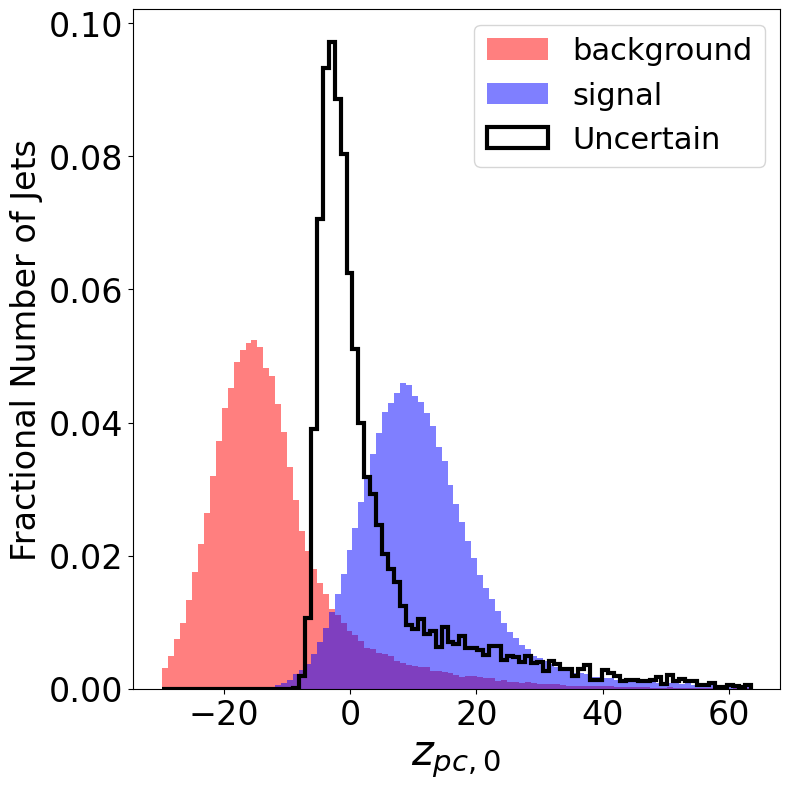

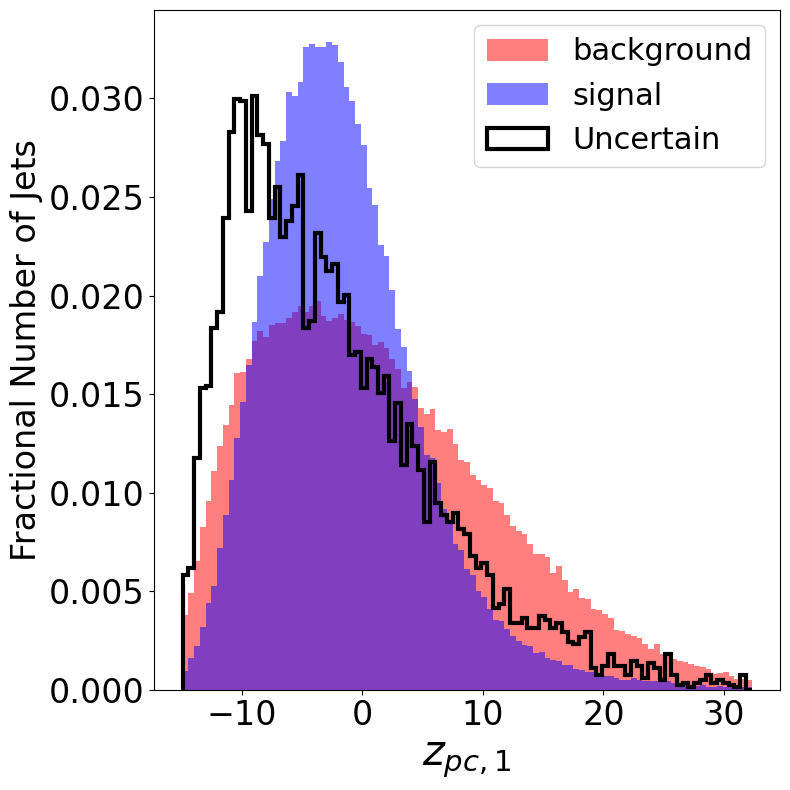

In [11]:
pc2plot = [0, 1]
colors=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'gold']
unc_thr = 0.8
fp_fn = True
nbins = 100

for ii in pc2plot:
    plt.figure(figsize=(8,8))
    mrs = []
    mls = []
    for i in range(len(names)):
        data = latents_pca[labels == i, ii]
        mrs.append(np.percentile(data, 99.5))
        mls.append(np.percentile(data, 0.5))


    mr = max(mrs)
    ml = min(mls)
    m = mr - ml
    for i in range(len(uniq_names)):
        bkg_data = latents_pca[np.in1d(labels, np.where(names == uniq_names[i])[0]), ii]
        plt.hist(bkg_data, bins=np.arange(ml,mr,m/nbins), label=uniq_names[i],
                 color=colors[i], alpha=0.5, weights = (1./len(bkg_data)) * np.ones_like(bkg_data))

    if fp_fn:

        false_data = latents_pca[(uncs > unc_thr) & (labels != preds), ii]

        plt.hist(false_data, bins=np.arange(ml,mr,m/nbins), label='Uncertain',
                 color='black',  histtype='step', linewidth = 3,
                 weights = (1./len(false_data)) * np.ones_like(false_data))

    plt.xlabel('$z_{pc,' + '{}'.format(ii) + '}$', fontsize=30)
    plt.ylabel("Fractional Number of Jets", fontsize = 24)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.legend(fontsize = 22)
    plt.tight_layout()
    # plt.savefig("figures/zpca_{}_{}.pdf".format(ii, model2explore))
    plt.show()


C:\Users\khota\AppData\Local\Temp\ipykernel_22236\614922001.py:18: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  indices = np.in1d(labels, np.where(names == uniq_names[i])[0])


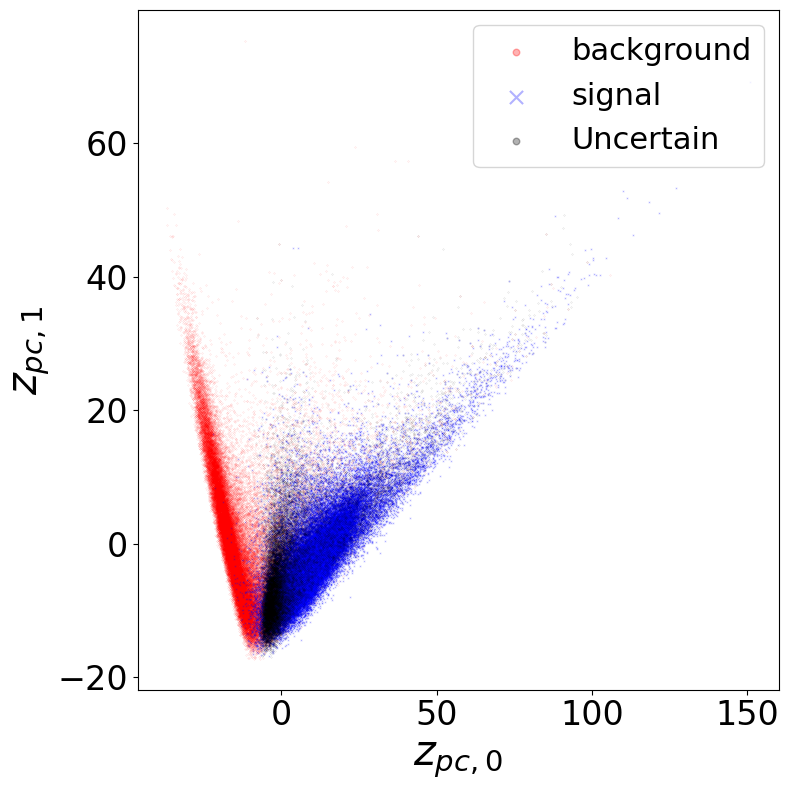

In [12]:
IDs = [(0,1)]
Nsample = 50000 # 30000
colors=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'gold']
unc_thr = 0.8
fp_fn = True

#Nsample = 30000
if optional_dataset != 'jetclass':
    markers = ['.', 'x', '.', 'x', '.']
else:
    markers = ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']

for (idx1, idx2) in IDs:
    plt.figure(figsize = (8,8))

    false_indices = (uncs > unc_thr)
    for i in range(len(uniq_names)):
        indices = np.in1d(labels, np.where(names == uniq_names[i])[0])
        plt.scatter(latents_pca[indices, idx1][:Nsample],
                latents_pca[indices, idx2][:Nsample],
                color = colors[i], marker = markers[i], label = uniq_names[i],
                alpha=0.3, s = 0.1, rasterized=True)

#     if "topdata" in model2explore and fp_fn:
#         fp_indices_lu = (labels == 0) & (preds >= 0.5) & (uncs > unc_thr)
#         fn_indices_lu = (labels == 1) & (preds < 0.5)  &  (uncs > unc_thr)

#         plt.scatter(latents_pca[fp_indices_lu, idx1][:Nsample],
#                 latents_pca[fp_indices_lu, idx2][:Nsample],
#                 color = 'black', marker = '.', label = 'FP',
#                 alpha=0.3, s = 0.1, rasterized=True)
#         plt.scatter(latents_pca[fn_indices_lu, idx1][:Nsample],
#                 latents_pca[fn_indices_lu, idx2][:Nsample],
#                 color = 'maroon', marker = 'x', label = 'FN',
#                 alpha=0.3, s = 0.1, rasterized=True)
    if fp_fn:
        plt.scatter(latents_pca[false_indices, idx1][:Nsample],
                latents_pca[false_indices, idx2][:Nsample],
                color = 'black', marker = '.', label = 'Uncertain',
                alpha=0.3, s = 0.1, rasterized=True) # alpha=0.7


    plt.xlabel('$z_{pc,' + '{}'.format(idx1) + '}$', fontsize=30)
    plt.ylabel('$z_{pc,' + '{}'.format(idx2) + '}$', fontsize=30)
    plt.tick_params( axis='both', which='major', labelsize=24)
    plt.legend(loc='upper right', markerscale = 30, fontsize = 22)
    plt.tight_layout()

    # plt.xlim((-60,200)) # jetnet
    # plt.ylim((-40,70)) # jetnet
    # plt.xlim((-10,27)) # jetclass
    # plt.ylim((-5, 15)) # jeclass
    # plt.savefig("figures/scatter_zpca_{}_{}_{}.pdf".format(idx1, idx2, model2explore))
    plt.show()


#### Baseline Comparison Plot

Below, we plot the Misclassification Detection Rate vs. the Correct Jet Mistag Rate. The area under this curve is the `AUROC` we referenced previously. In the plots below, EDL has a higher AUROC than both of the baselines, indicating more discriminative uncertainty while only using one forward pass (as opposed to the baselines that use 10 forward passes).

baseline


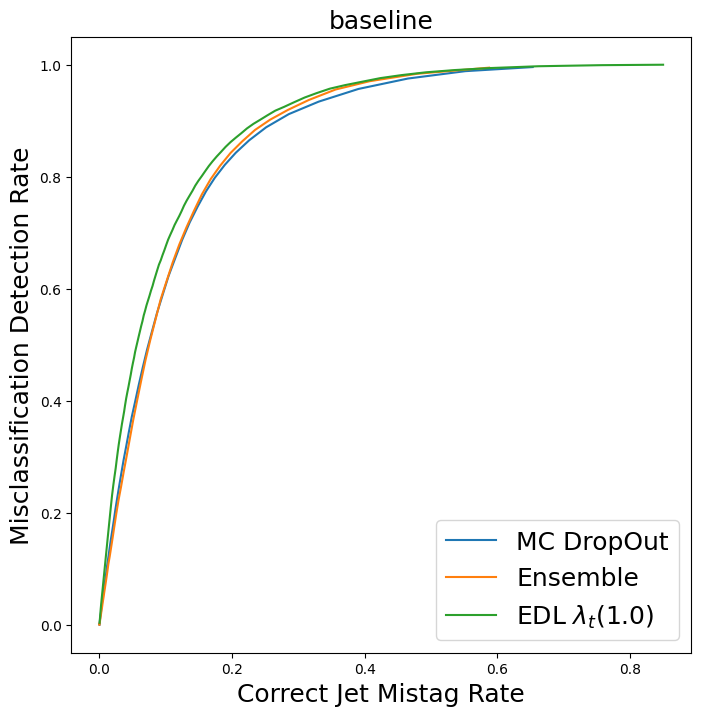

In [13]:
dataset = optional_dataset
for tag in ["baseline"]:
    print(tag)
    model_results = {}
    plotter_map = {}

    fnames = ["RESULTS_UQPFIN_MCDO_" + dataset + "_{}.h5",
              "RESULTS_UQPFIN_Ensemble_" + dataset + "_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.1_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.5_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.7_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_1.0_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.1_{}_ocmodel.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.5_{}_ocmodel.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.7_{}_ocmodel.h5",
              ]
    fnames = np.array([os.path.join(results_dir, f) for f in fnames])
    types = np.array(["MC DropOut", "Ensemble", r"EDL $\lambda_t (0.1)$", r"EDL $\lambda_t (0.5)$", r"EDL $\lambda_t (0.7)$", r"EDL $\lambda_t (1.0)$",
             r"EDL-CT $\lambda_t^{\texttt{CT}} (0.1)$", r"EDL-CT $\lambda_t^{\texttt{CT}} (0.5)$", r"EDL-CT $\lambda_t^{\texttt{CT}} (0.7)$" ])

    if dataset == "topdata":
        fnames = fnames[[0, 1, 5]]
        types = types[[0, 1, 5]]


    if "skip" in tag:
        fnames[4] = fnames[4].replace("0.7", "0.6")
        types[4] = types[4].replace("0.7", "0.6")

    for ii, fname in enumerate(fnames):
        fname = glob.glob(fname.format(tag))[-1]
        f = h5py.File(fname, "r")
        model_results[types[ii]] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:]}
        if tag == "baseline":
            model_results[types[ii]]['oods'] = f['labels'][:] != f['preds'][:]
        f.close()
        plotter_map[types[ii]] = PlotterTools(model_results[types[ii]], types[ii])


    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].ODR_IDAcc(ax)
    # ax.axhline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    # ax.set_xlabel("ID Accuracy", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].ODR_Acc(ax)
    # ax.axhline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    # ax.set_xlabel("Accuracy", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].OCR_ODR(ax)
    # ax.axvline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_xlabel("OOD Detection Rate", fontsize = 18)
    # ax.set_ylabel("OOD Precision Rate", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()



    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].ODR_IMR(ax)
    ax.legend(fontsize = 18)
    if "skip" in tag:
        ax.set_ylabel("OOD Detection Rate", fontsize = 18)
        ax.set_xlabel("ID Mistag Rate", fontsize = 18)
    else:
        ax.set_ylabel("Misclassification Detection Rate", fontsize = 18)
        ax.set_xlabel("Correct Jet Mistag Rate", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    # fig.savefig("figures/"+dataset+"_"+tag+".pdf",  dpi = 150, bbox_inches='tight')
    plt.show()


    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].RAR_RER(ax)
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("Remaining Accuracy Rate", fontsize = 18)
    # ax.set_xlabel("Remaining Error Rate", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    print('\n\n')
    del model_results
    gc.collect()


## `JetNet` Model

For this model, we examine the use of EDL on anomaly detection. This means that we don't include a class (or classes) during training, and we examine their uncertainties during test. In this case, we skip $t$-quarks during training. The goal is for these anomalous / out-of-distribution (OOD) jets to have high uncertainties while all other jets should have low uncertainties. This ensures that we can accurately detect anomalies.

### Training

First, we load the pre-loaded parameters for our model. The name of the file corresponds to the $\lambda_t$ used in the loss. `nominal` means increasing over epochs with slope 0.1. `0.5` refers to the maximum $\lambda_t$. You can change the name of your file to use different strengths for the KL Divergence term. `skiptop` means that we skip top quarks during training.

In [14]:
file_name = 'UQPFIN_jetnet_nominal_0.5_skiptop.json'
parameters = json.load(open(f'json_files/{file_name}'))
parameters

{'outdir': './trained_models/',
 'outdictdir': './trained_model_dicts/',
 'Np': 60,
 'n_phiI': 128,
 'x_mode': 'sum',
 'phi_nodes': '100,100,64',
 'f_nodes': '64,100,100',
 'epochs': 300,
 'label': 'jetnet_nominal_0.5_skiptop',
 'batch_size': 250,
 'data_loc': './datasets/',
 'data_type': 'jetnet',
 'preload': False,
 'preload_file': '',
 'klcoef': 'nominal_0.5',
 'massrange': 'AND:0,10000.',
 'ptrange': 'AND:0,10000',
 'etarange': 'AND:-6,6',
 'skiplabels': '2',
 'batchmode': False,
 'use_softmax': False,
 'use_dropout': False,
 'ndata': 0}

Then, we can train the model and save the checkpoints based on the highest accuracy. If you want to instead use the results that I've already trained, you don't need to run these next two cells.

In [ ]:
!python train.py --load-json json_files/UQPFIN_jetnet_nominal_0.5_skiptop.json

In [ ]:
%run evaluate_model.py --data jetnet --make-file --type edl

### Evaluation

We can then evaluate the results on a test set, visualize the uncertainties, examine the latent space, and compare EDL with baselines like Ensemble and MC Dropout. Below, we look at the accuracy and `AUROC`. Area Under the Receiver Operating Characteristic Curve (`AUROC`) is commonly used metric to represent the overall quality of binary classification models. In our context, the `AUROC` represents how well the uncertainty estimate of a model correlates with an inability of the model to distinguish certain jet classes or identify anomalous jets. 

In a well-trained classification model, we want the model to be confident, i.e. assign low uncertainties, for correctly classified jets. On the other hand, large uncertainties should be associated with misclassified jets (in a UQ model) or anomalous jets (in an anomaly detection model). A higher value of the AUROC would represent the model's superiority in projecting confidence for correctly classified jets while assigning larger uncertainties for incorrectly classified or anomalous jets, depending on the model.

In [15]:
#optional parameters to only evaluate certain models
optional_dataset = 'jetnet'
optional_tag = ''
results_dir = 'results/'
saved_model_loc = "./trained_models/"
saved_model_dict_loc = "./trained_model_dicts/"

result_files = sorted([f for f in os.listdir(results_dir) if optional_dataset in f and optional_tag in f
                       and '.h5' in f and 'slope' not in f and 'mask' not in f])
print('\n'.join(result_files))

RESULTS_UQPFIN_Ensemble_jetnet_skiptop.h5
RESULTS_UQPFIN_MCDO_jetnet_skiptop.h5
RESULTS_UQPFIN_best_jetnet_nominal_0.5_skiptop.h5


Below, we compute the accuracy and `AUROC` for the EDL and baseline models. In this case, EDL has slightly lower accuracy and lower `AUROC` than the Ensemble baseline.

In [16]:
for modelname in result_files:
    model_results = {}
    if "best" in modelname:
      mname = modelname[20:-3]
    else:
      mname = modelname[15:-3]
    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    labels, preds, oods, probs, uncs, sums = f['labels'][:], f['preds'][:], f['oods'][:], f['probs'][:], f['uncs'][:], f['sums'][:]
    acc = accuracy_score(labels[~oods], preds[~oods])*100
    if "topdata" in mname:
        probs2=probs
    else:
        skiplabels = np.unique(labels[oods])
        probs2=np.delete(probs, skiplabels, 1)

    if probs2.shape[1] == 2:
        probs2 = probs2[:, 1]

    # misclassification detection vs out-of-distribution detection
    if "baseline" in mname:
        oods = labels != preds

    this_file = os.path.join(saved_model_loc, modelname[8:-3])
    gc.collect()

    # Sensory et al EDL Uncertainty
    auc = roc_auc_score(oods, uncs) * 100
    print("{:<28}  \t\t Accuracy: {:>6.2f}%  \t AUROC: {:>6.2f}%".format(mname, acc, auc))


Ensemble_jetnet_skiptop       		 Accuracy:  82.17%  	 AUROC:  76.62%
MCDO_jetnet_skiptop           		 Accuracy:  81.03%  	 AUROC:  65.60%
jetnet_nominal_0.5_skiptop    		 Accuracy:  81.45%  	 AUROC:  75.44%


#### EDL Uncertainty Plots

In contrast to the binary classification of the `TopData` dataset, `JetNet` has five distinct classes of jets, giving a more comprehensive overview of how the EDL uncertainty behaves in a multiclass scenario. The \JetNet dataset contains the following jets with their corresponding class labels: quarks (0), gluons (1), top quarks (2), $W$ bosons (3), and $Z$ bosons (4).

In the bottom right figure, EDL assigns high uncertainties to most anomalous jets, which serves as an indicator of the predictive limitations of the model on anomalous data. There are many high-uncertainty QCD jets from misclassifications, making it difficult to differentiate between the in-distribution QCD jets and out-of-distribution top jets. This points to a fundamental challenge in using EDL for OOD jet detection. The EDL uncertainty, in its simplest form, fails to distinguish between the jets that are hard to tell-apart and the jets that are unknown from the training data. This limitation makes Ensemble models remain competitive and a relatively simpler alternative, despite their high computational cost.

jetnet_nominal_0.5_skiptop


C:\Users\khota\AppData\Local\Temp\ipykernel_22236\854058456.py:116: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  indices = np.in1d(labels, np.where(groups == uniq_names[i])[0])
C:\Users\khota\AppData\Local\Temp\ipykernel_22236\854058456.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])
C:\Users\khota\AppData\Local\Temp\ipykernel_22236\854058456.py:225: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])


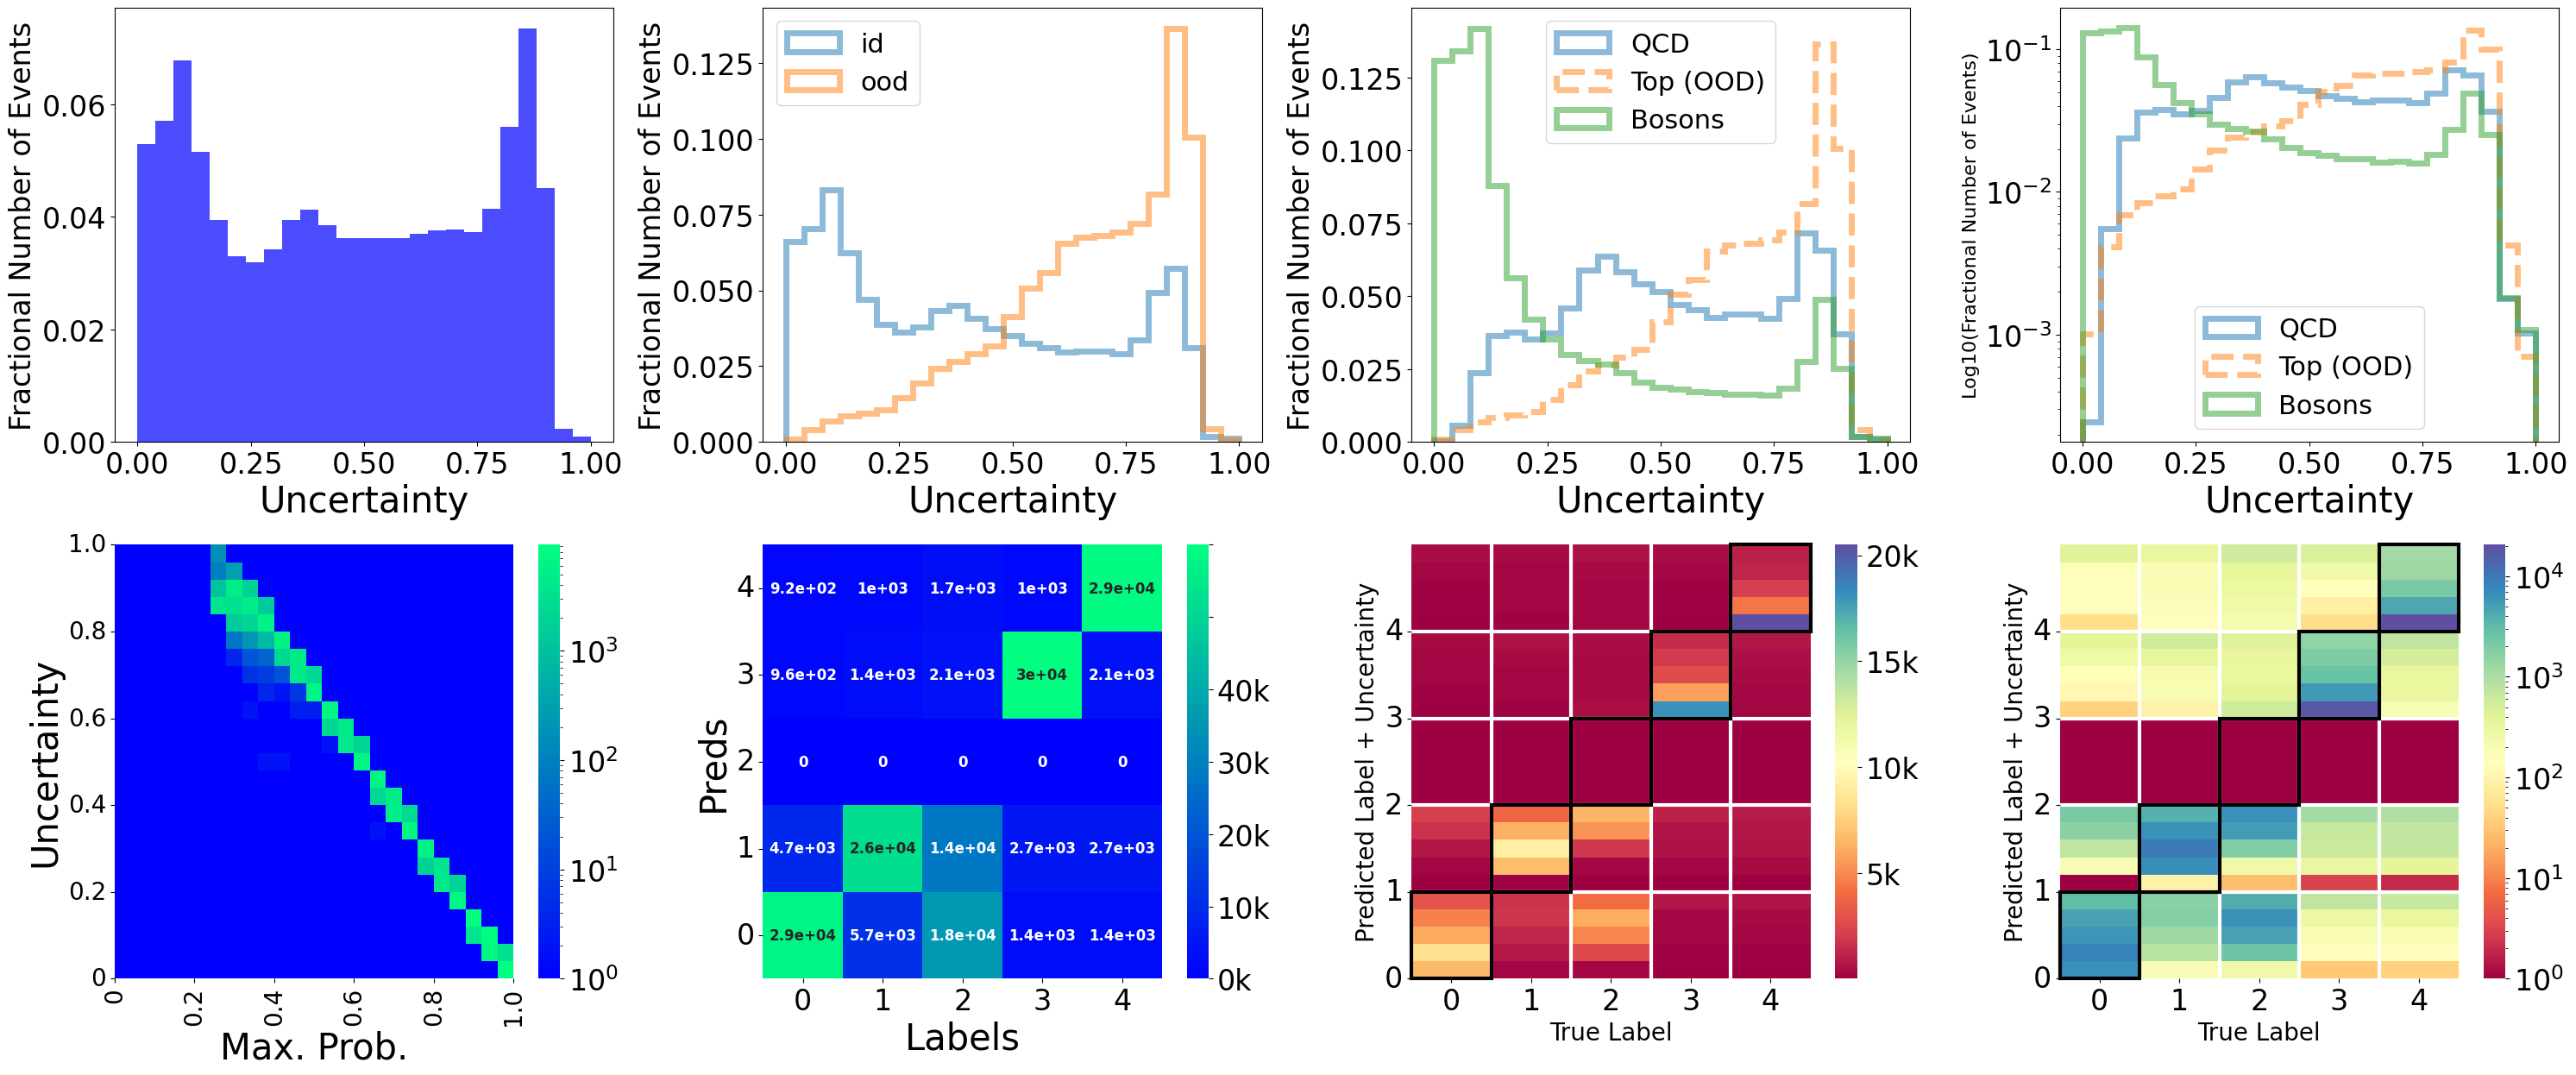

In [17]:
for modelname in result_files:
    if "best" not in modelname:
      continue
    key = modelname[20:-3]
    print(key)

    if "jetnet" in key:
        l_max = 5
        fsize=18
        groups = ['QCD', 'QCD', 'Top', 'Bosons', 'Bosons']
    elif "jetclass" in key:
        l_max = 10
        fsize=10
        groups = ['QCD', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Bosons', 'Bosons', 'Top', 'Top']
    elif "JNqgmerged" in key:
        l_max = 4
    else:
        l_max = 2
        fsize=16
        groups = ["background", "signal"]
    groups = np.array(groups)

    uniq_names, ind = np.unique(groups, return_index=True)
    uniq_names = uniq_names[np.argsort(ind)]


    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    labels, preds, maxprobs, sums, oods, uncs, probs = f['labels'][:], f['preds'][:], \
                                                f['maxprobs'][:], f['sums'][:], \
                                                f['oods'][:], f['uncs'][:], f['probs'][:]
    f.close()

    split = key.split('_')
    coeff = "_".join(split[1:-1])
    # Choose to use D-STD Uncertainty or not
    for use_std in [False]:
        high_unc = 0.8
        if use_std:
            sums = torch.from_numpy(sums).reshape(-1,1)
            probs = torch.from_numpy(probs)
            uncs = torch.sqrt(((probs*(1 - probs))/(sums + 1))).sum(1).numpy()
            coeff += "_std"
            high_unc = 0.5

        savefolder = "figures/{}/{}/{}/".format(split[0], split[-1], coeff)
        os.makedirs(savefolder, exist_ok=True)

        if 'baseline' in key:
            f1 = 'correct'
            f2 = 'incorrect'
            oods = labels != preds
        else:
            f1 = 'id'
            f2 = 'ood'


        mult_label = "Unc"
        if "_0_" in key:
            if "topdata" in key:
                multiple = 300
                if use_std:
                    multiple = 30
            elif "jetnet" in key:
                if "skiptop" in key:
                    multiple = 5
                elif "skiptwz" in key:
                    multiple = 25
                else:
                    multiple = 5*2.5
                    if "skipwz" in key and not use_std:
                        multiple *= 4
            elif "jetclass" in key:
                if "baseline" in key:
                    multiple = 15
                elif "skipwz" in key:
                    multiple = 5*2.5
                else:
                    multiple = 25
            uncs = uncs * multiple
            mult_label = str(multiple) + r' $\times$ Unc'

        # Create combined figure with all plots
        fig = plt.figure(figsize=(30, 24))
        
        # Counter for subplot position
        plot_idx = 1

        for types in ['total', 'separate']:
            # Uncertainty distribution
            ax = plt.subplot(4, 4, plot_idx)
            plot_idx += 1

            if 'total' in types:
                ax.hist(uncs, bins=np.arange(0.,1.01,0.04), alpha = 0.7, color='blue', weights = (1./len(uncs)) * np.ones_like(uncs))
            else:
                ax.hist(uncs[~oods], bins=np.arange(0.,1.01,0.04), label=f1, alpha = 0.5, histtype = 'step', linewidth = 5, weights = (1./len(uncs[~oods])) * np.ones_like(uncs[~oods]))
                ax.hist(uncs[oods], bins=np.arange(0.,1.01,0.04), label=f2, alpha = 0.5, histtype = 'step', linewidth = 5, weights = (1./len(uncs[oods])) * np.ones_like(uncs[oods]))
                ax.legend(fontsize = 22)
            ax.set_xlabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax.set_ylabel("Fractional Number of Events", fontsize = 24)
            if 'log' in types:
                ax.set_ylabel("Log10(Fractional Number of Events)", fontsize = 24)
                ax.set_yscale('log')
            ax.tick_params(axis='both', which='major', labelsize=24)
            ax.yaxis.get_offset_text().set_fontsize(24)


        for types in ['normal', 'log']:
            # Uncertainty distribution
            ax = plt.subplot(4, 4, plot_idx)
            plot_idx += 1

            for i in range(len(uniq_names)):
                indices = np.in1d(labels, np.where(groups == uniq_names[i])[0])
                if np.any(indices & oods) and "skip" in key:
                    lstyle = '--'
                    lbel = f"{uniq_names[i]} (OOD)"
                else:
                    lstyle = '-'
                    lbel = uniq_names[i]
                ax.hist(uncs[indices], bins=np.arange(0.,1.01,0.04), label=lbel, alpha = 0.5, histtype = 'step', linewidth = 5, linestyle = lstyle, weights = (1./len(uncs[indices])) * np.ones_like(uncs[indices]))
            ax.legend(fontsize = 22)
            ax.set_xlabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax.set_ylabel("Fractional Number of Events", fontsize = 24)
            if 'log' in types:
                ax.set_ylabel("Log10(Fractional Number of Events)", fontsize = 16)
                ax.set_yscale('log')
            ax.tick_params(axis='both', which='major', labelsize=24)
            ax.yaxis.get_offset_text().set_fontsize(24)


        filetypes = ['total']
        indices = [oods | ~oods]


        for filetype, idx in zip(filetypes, indices):
            # Max Prob. vs Uncertainty distribution (Log Scale)
            hist, _, _ = np.histogram2d(maxprobs[idx], uncs[idx], bins = [np.arange(0.,1.01,0.04), np.arange(0.,1.01,0.04)])

            ax_main = plt.subplot(4, 4, plot_idx)
            plot_idx += 1
            heatmap = sns.heatmap(hist.T+1, annot=False, cmap='winter', ax=ax_main, norm=LogNorm())
            ax_main.invert_yaxis()
            ax_main.set_xlabel("Max. Prob.", fontsize=30)
            ax_main.set_ylabel("Uncertainty".replace("Unc", mult_label), fontsize=30)
            ax_main.set_yticks(np.arange(0, 26, 5))
            ax_main.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=0)
            ax_main.set_xticks(np.arange(0, 26, 5))
            ax_main.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
            ax_main.tick_params(axis='both', which='major', labelsize=20)
            cbar = heatmap.collections[0].colorbar
            cbar.ax.tick_params(labelsize=24)

        for filetype, idx in zip(filetypes, indices):
            # Labels vs Preds
            arr = np.zeros((l_max,l_max))
            for i in range(l_max):
                for j in range(l_max):
                    arr[j, i] = np.sum((labels[idx] == i) & (preds[idx] == j))

            ax_main = plt.subplot(4, 4, plot_idx)
            plot_idx += 1
            heatmap = sns.heatmap(arr, annot=True, cmap='winter', annot_kws={"size": 12, "weight": "bold"}, ax=ax_main)
            ax_main.invert_yaxis()
            ax_main.set_xlabel("Labels", fontsize=30)
            ax_main.set_ylabel("Preds", fontsize=30)
            ax_main.tick_params(axis='both', which='major', labelsize=24)
            ax_main.tick_params(axis='y', labelrotation=0)
            cbar = heatmap.collections[0].colorbar
            cbar.ax.tick_params(labelsize=24)
            cbar.ax.yaxis.get_offset_text().set_fontsize(24)
            if 'topdata' in key or 'jetnet' in key:
                tick_values = cbar.get_ticks()
                cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])

        for types in ['normal', 'log']:
            for filetype, idx in zip(filetypes, indices):
                # Labels vs Preds + Uncertainty
                uncertainty_bins = np.zeros((5*l_max, l_max))  # 5 bins for uncertainty
                for i in range(l_max):
                    for j in range(l_max):
                        filtered_indices = (labels[idx] == i) & (preds[idx] == j)
                        if np.sum(filtered_indices) > 0:
                            # Create histogram for uncertainty values in 5 bins
                            hist, _ = np.histogram(uncs[idx][filtered_indices], bins=5, range=(0, 1))
                            for k in range(5):
                                uncertainty_bins[5*j+k, i] = hist[k]

                ax_main = plt.subplot(4, 4, plot_idx)
                plot_idx += 1
                if 'log' in types:
                    norm = LogNorm()
                else:
                    norm = None
                uncertainty_bins_clean = np.where(uncertainty_bins == 0, 1, uncertainty_bins)
                heatmap = sns.heatmap(uncertainty_bins_clean, annot=False, cmap='Spectral', annot_kws={"size": fsize, "weight": "bold"}, ax=ax_main, norm=norm)
                ax_main.invert_yaxis()
                uacm_axsize = 20
                if "jetclass" in key:
                    uacm_axsize = 20
                ax_main.set_xlabel("True Label", fontsize=uacm_axsize)
                ax_main.set_ylabel("Predicted Label + Uncertainty".replace("Unc", mult_label), fontsize=uacm_axsize)
                for jj in np.arange(5,5*l_max, 5):
                    ax_main.axhline(jj, linewidth=3, color='white', zorder=1)
                    ax_main.axvline(jj//5, linewidth=3, color='white', zorder=1)
                for i in range(l_max):
                    ax_main.add_patch(
                        plt.Rectangle((i, 5*i), 1, 5,
                                      fill=False, edgecolor='black', linewidth=3, zorder=3, clip_on=False)
                    )

                ax_main.set_yticks(np.arange(0, 5*l_max, 5))
                ax_main.set_yticklabels(np.arange(0, l_max), rotation=0)
                uacm_fsize = 24
                if "jetclass" in key:
                    uacm_fsize = 16
                ax_main.tick_params(axis='both', which='major', labelsize=uacm_fsize)
                cbar = heatmap.collections[0].colorbar
                cbar.ax.tick_params(labelsize=uacm_fsize)
                cbar.ax.yaxis.get_offset_text().set_fontsize(uacm_fsize)
                if ('topdata' in key or 'jetnet' in key) and 'normal' in types:
                    tick_values = cbar.get_ticks()
                    cbar.set_ticklabels([f'{int(tick / 1000)}k' for tick in tick_values])

        plt.tight_layout()
        # plt.savefig("{}/combined_all_plots.pdf".format(savefolder), dpi = 150, bbox_inches='tight')
        plt.show()
        plt.close()

#### Latent Space Visualization

We set an uncertainty threshold at 0.8 and examine the distributions of the first principal component of the anomalous jets with an uncertainty higher than this threshold. We group jet classes based on initiating particle types and analyze the latent space in the below figures. It is instructive to see that many top-quarks have high uncertainties, but so do misclassified jets. Even in the latent space, we can see it is difficult to distinguished between anomalies and misclassified jets.

In [18]:
try:
    del model_results
    gc.collect()
except:
    pass
model_results = {}

for modelname in result_files:
    if 'best' in modelname:
        mname = modelname[20:-3]
    else:
        mname = modelname[15:-3]
    print(mname)
    filename = os.path.join(results_dir, modelname)

    f = h5py.File(filename, "r")
    if 'best' in modelname:
        model_results[mname] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:],
                                   'aug': f['aug'][:],
                                   'latents': f['latents'][:]}
    else:
        model_results[mname] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:],
                                   'aug': f['aug'][:]}
    f.close()


Ensemble_jetnet_skiptop
MCDO_jetnet_skiptop
jetnet_nominal_0.5_skiptop


In [19]:
group_names = True

if optional_dataset == 'topdata':
    true_classes = [0, 1] # 0:QCD, 1:top
    names = ["background", "signal"]
    groups = ["background", "signal"]
if optional_dataset == 'jetnet':
    true_classes = [0, 1, 2, 3, 4] # 0: g, 1:q, 2:t, 3:w, 4:z
    names = ['light quarks', 'gluons', 'top quarks', 'W bosons', 'Z bosons']
    groups = ['QCD', 'QCD', 'Top', 'Bosons', 'Bosons']
if optional_dataset == 'jetclass':
    true_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # 0: g, 1:q, 2:t, 3:w, 4:z
    names = ['l_QCD', 'l_Hbb', 'l_Hcc', 'l_Hgg', 'l_H4q', 'l_Hqql', 'l_Zqq', 'l_Wqq', 'l_Tbqq', 'l_Tbl']
    groups = ['QCD', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Higgs', 'Bosons', 'Bosons', 'Top', 'Top']
if optional_dataset == 'JNqgmerged':
    true_classes = [0, 1, 2, 3] # 0: g/q, 1:t, 2:w, 3:z
    names = ['QCD', 'top quarks', 'W bosons', 'Z bosons']
    groups = ['QCD', 'Top', 'Bosons', 'Bosons']

names = np.array(names)
groups = np.array(groups)
true_names = np.array(names)

if group_names:
    names = groups

uniq_names, ind = np.unique(names, return_index=True)
uniq_names = uniq_names[np.argsort(ind)]

In [20]:
#only works for EDL models
model2explore = "jetnet_nominal_0.5_skiptop"
labels, preds, uncs, latents, oods = model_results[model2explore]['labels'], model_results[model2explore]['preds'], \
                                     model_results[model2explore]['uncs'],   model_results[model2explore]['latents'], \
                                     model_results[model2explore]['oods']


pca = PCA(n_components=0.99)
pca.fit(latents[~oods])

latents_pca = pca.fit_transform(latents)
latents_pca.shape

(176000, 21)

C:\Users\khota\AppData\Local\Temp\ipykernel_22236\4086446743.py:21: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  bkg_data = latents_pca[np.in1d(labels, np.where(names == uniq_names[i])[0]), ii]


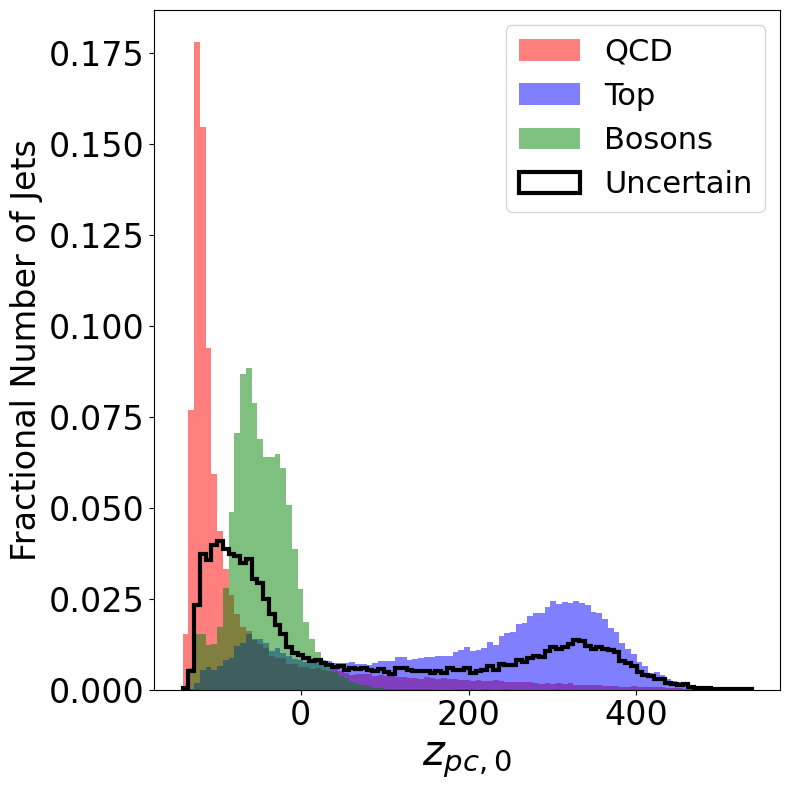

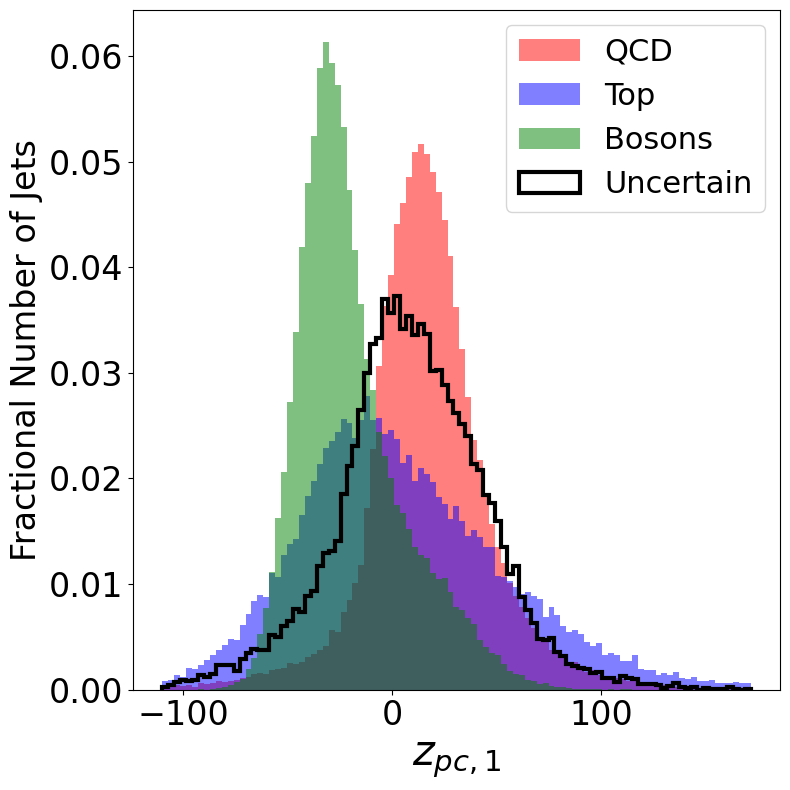

In [21]:
pc2plot = [0, 1]
colors=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'gold']
unc_thr = 0.8
fp_fn = True
nbins = 100

for ii in pc2plot:
    plt.figure(figsize=(8,8))
    mrs = []
    mls = []
    for i in range(len(names)):
        data = latents_pca[labels == i, ii]
        mrs.append(np.percentile(data, 99.5))
        mls.append(np.percentile(data, 0.5))


    mr = max(mrs)
    ml = min(mls)
    m = mr - ml
    for i in range(len(uniq_names)):
        bkg_data = latents_pca[np.in1d(labels, np.where(names == uniq_names[i])[0]), ii]
        plt.hist(bkg_data, bins=np.arange(ml,mr,m/nbins), label=uniq_names[i],
                 color=colors[i], alpha=0.5, weights = (1./len(bkg_data)) * np.ones_like(bkg_data))

    if fp_fn:

        false_data = latents_pca[(uncs > unc_thr) & (labels != preds), ii]

        plt.hist(false_data, bins=np.arange(ml,mr,m/nbins), label='Uncertain',
                 color='black',  histtype='step', linewidth = 3,
                 weights = (1./len(false_data)) * np.ones_like(false_data))

    plt.xlabel('$z_{pc,' + '{}'.format(ii) + '}$', fontsize=30)
    plt.ylabel("Fractional Number of Jets", fontsize = 24)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.legend(fontsize = 22)
    plt.tight_layout()
    # plt.savefig("figures/zpca_{}_{}.pdf".format(ii, model2explore))
    plt.show()


C:\Users\khota\AppData\Local\Temp\ipykernel_22236\614922001.py:18: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  indices = np.in1d(labels, np.where(names == uniq_names[i])[0])


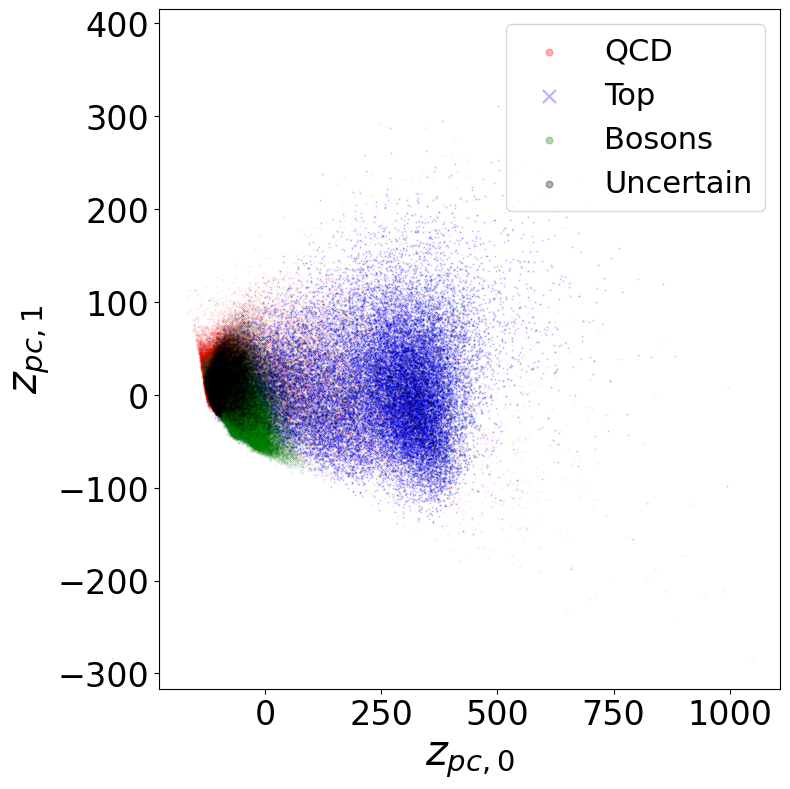

In [22]:
IDs = [(0,1)]
Nsample = 50000 # 30000
colors=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'gold']
unc_thr = 0.8
fp_fn = True

#Nsample = 30000
if optional_dataset != 'jetclass':
    markers = ['.', 'x', '.', 'x', '.']
else:
    markers = ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']

for (idx1, idx2) in IDs:
    plt.figure(figsize = (8,8))

    false_indices = (uncs > unc_thr)
    for i in range(len(uniq_names)):
        indices = np.in1d(labels, np.where(names == uniq_names[i])[0])
        plt.scatter(latents_pca[indices, idx1][:Nsample],
                latents_pca[indices, idx2][:Nsample],
                color = colors[i], marker = markers[i], label = uniq_names[i],
                alpha=0.3, s = 0.1, rasterized=True)

#     if "topdata" in model2explore and fp_fn:
#         fp_indices_lu = (labels == 0) & (preds >= 0.5) & (uncs > unc_thr)
#         fn_indices_lu = (labels == 1) & (preds < 0.5)  &  (uncs > unc_thr)

#         plt.scatter(latents_pca[fp_indices_lu, idx1][:Nsample],
#                 latents_pca[fp_indices_lu, idx2][:Nsample],
#                 color = 'black', marker = '.', label = 'FP',
#                 alpha=0.3, s = 0.1, rasterized=True)
#         plt.scatter(latents_pca[fn_indices_lu, idx1][:Nsample],
#                 latents_pca[fn_indices_lu, idx2][:Nsample],
#                 color = 'maroon', marker = 'x', label = 'FN',
#                 alpha=0.3, s = 0.1, rasterized=True)
    if fp_fn:
        plt.scatter(latents_pca[false_indices, idx1][:Nsample],
                latents_pca[false_indices, idx2][:Nsample],
                color = 'black', marker = '.', label = 'Uncertain',
                alpha=0.3, s = 0.1, rasterized=True) # alpha=0.7


    plt.xlabel('$z_{pc,' + '{}'.format(idx1) + '}$', fontsize=30)
    plt.ylabel('$z_{pc,' + '{}'.format(idx2) + '}$', fontsize=30)
    plt.tick_params( axis='both', which='major', labelsize=24)
    plt.legend(loc='upper right', markerscale = 30, fontsize = 22)
    plt.tight_layout()

    # plt.xlim((-60,200)) # jetnet
    # plt.ylim((-40,70)) # jetnet
    # plt.xlim((-10,27)) # jetclass
    # plt.ylim((-5, 15)) # jeclass
    # plt.savefig("figures/scatter_zpca_{}_{}_{}.pdf".format(idx1, idx2, model2explore))
    plt.show()


#### Baseline Comparison Plot

Below, we plot the OOD Detection Rate vs. the Correct Jet Mistag Rate. The area under this curve is the `AUROC` we referenced previously. In the plots below, MC Dropout is not good. EDL and Ensemble are very close to each other with Ensemble just slightly having a higher `AUROC`.

skiptop


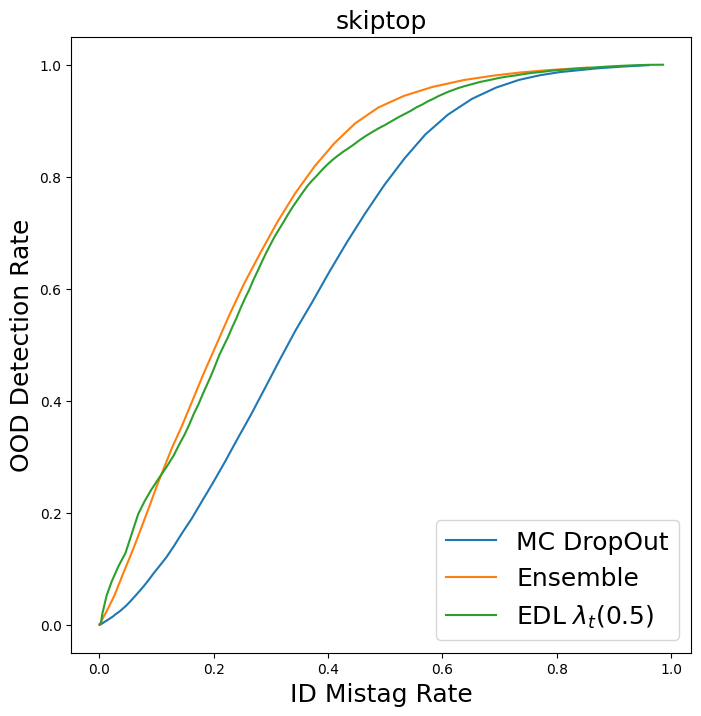

In [23]:
dataset = optional_dataset
for tag in ["skiptop"]:
    print(tag)
    model_results = {}
    plotter_map = {}

    fnames = ["RESULTS_UQPFIN_MCDO_" + dataset + "_{}.h5",
              "RESULTS_UQPFIN_Ensemble_" + dataset + "_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.1_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.5_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_0.7_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "_nominal_1.0_{}.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.1_{}_ocmodel.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.5_{}_ocmodel.h5",
              "RESULTS_UQPFIN_best_" + dataset + "*_0.7_{}_ocmodel.h5",
              ]
    fnames = np.array([os.path.join(results_dir, f) for f in fnames])
    types = np.array(["MC DropOut", "Ensemble", r"EDL $\lambda_t (0.1)$", r"EDL $\lambda_t (0.5)$", r"EDL $\lambda_t (0.7)$", r"EDL $\lambda_t (1.0)$",
             r"EDL-CT $\lambda_t^{\texttt{CT}} (0.1)$", r"EDL-CT $\lambda_t^{\texttt{CT}} (0.5)$", r"EDL-CT $\lambda_t^{\texttt{CT}} (0.7)$" ])

    if dataset == "topdata":
        fnames = fnames[[0, 1, 5]]
        types = types[[0, 1, 5]]
    if dataset == "jetnet":
        fnames = fnames[[0, 1, 3]]
        types = types[[0, 1, 3]]

    for ii, fname in enumerate(fnames):
        fname = glob.glob(fname.format(tag))[-1]
        f = h5py.File(fname, "r")
        model_results[types[ii]] = {'labels' : f['labels'][:],
                                   'preds': f['preds'][:],
                                   'maxprobs': f['maxprobs'][:],
                                   'sums':f['sums'][:],
                                   'oods':f['oods'][:],
                                   'uncs': f['uncs'][:],
                                   'probs': f['probs'][:]}
        if tag == "baseline":
            model_results[types[ii]]['oods'] = f['labels'][:] != f['preds'][:]
        f.close()
        plotter_map[types[ii]] = PlotterTools(model_results[types[ii]], types[ii])


    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].ODR_IDAcc(ax)
    # ax.axhline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    # ax.set_xlabel("ID Accuracy", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].ODR_Acc(ax)
    # ax.axhline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("OOD Detection Rate", fontsize = 18)
    # ax.set_xlabel("Accuracy", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].OCR_ODR(ax)
    # ax.axvline(0.75, color = "k", linestyle= "--")
    # ax.legend(fontsize = 18)
    # ax.set_xlabel("OOD Detection Rate", fontsize = 18)
    # ax.set_ylabel("OOD Precision Rate", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()



    fig, ax = plt.subplots(figsize=(8,8))
    for _t in types:
        plotter_map[_t].ODR_IMR(ax)
    ax.legend(fontsize = 18)
    if "skip" in tag:
        ax.set_ylabel("OOD Detection Rate", fontsize = 18)
        ax.set_xlabel("ID Mistag Rate", fontsize = 18)
    else:
        ax.set_ylabel("Misclassification Detection Rate", fontsize = 18)
        ax.set_xlabel("Correct Jet Mistag Rate", fontsize = 18)
    ax.set_title(tag, fontsize=18)
    # fig.savefig("figures/"+dataset+"_"+tag+".pdf",  dpi = 150, bbox_inches='tight')
    plt.show()


    # fig, ax = plt.subplots(figsize=(8,8))
    # for _t in types:
    #     plotter_map[_t].RAR_RER(ax)
    # ax.legend(fontsize = 18)
    # ax.set_ylabel("Remaining Accuracy Rate", fontsize = 18)
    # ax.set_xlabel("Remaining Error Rate", fontsize = 18)
    # ax.set_title(tag, fontsize=18)
    # plt.show()

    print('\n\n')
    del model_results
    gc.collect()


## Conclusion

As a method of UQ, EDL provides direct estimates of uncertainties on class-wise predictions expressed as standard deviations of a parametric Dirichlet distribution. Given the physical range of uncertainties associated with EDL-based UQ varies with each choice of the annealing hyperparameter, the uncertainties predicted by this model must be regarded as *post-hoc* uncertainties associated with a given instance of the model. In other words, EDL uncertainties express the confidence a model projects for a given choice of model parameters. These predictions should not be regarded as representative uncertainties distributed over a class of potential parameter and hyperparameter choices.

We also observe how the EDL-based uncertainty maps onto the latent space of the PFIN model. We demonstrate that high-uncertainty misclassified jets populate (based on the first principle component) at the intersection of jet distributions in latent space embeddings. It is evident from our studies of the latent space embeddings that a well-tuned EDL model can show strong uncertainty associations for misclassified and hard-to-tell-apart jets.

Finally, although the method of EDL shows promise leveraging UQ for the detection of OOD jets, anomaly detection (AD) using EDL can be limited in telling apart the OOD jets from the hard-to-tell-apart ID jets. Any attempt to reliably detect OOD jets can definitely benefit from additional degrees of freedom to identify anomalous jets from ID jets.

Post-hoc EDL uncertainties are reliable and highly discriminative estimates of model uncertainty, but it requires some effort to obtain performance optimization through hyperparameter tuning and training strategies. Our [paper](https://iopscience.iop.org/article/10.1088/2632-2153/ade51b) also lays out the primary optimization criteria for selecting the best model for a given use case. As EDL uncertainties can be obtained in a single pass on the data during inference stage with minimal additions and modifications to a neural network model for classification or regression, it opens up potential applications for uncertainty-aware algorithms and hardware co-design for edge and low-latency applications, such as fast data reduction, detector triggering, and AD. In regard to AD, there is potential to leverage EDL to improve the performance and model independence of traditional approaches such as autoencoders, which we leave to future work.

**References**

https://introtodeeplearning.com/2021/slides/6S191_MIT_DeepLearning_L7.pdf

https://iopscience.iop.org/article/10.1088/2632-2153/ade51b

https://arxiv.org/abs/1905.09638

https://proceedings.mlr.press/v48/gal16.html

https://arxiv.org/abs/1612.01474

https://papers.nips.cc/paper_files/paper/2018/hash/a981f2b708044d6fb4a71a1463242520-Abstract.html